In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
%matplotlib inline


train_fNxu4vz=pd.read_csv('train_fNxu4vz.csv')
test=pd.read_csv('test_fjtUOL8.csv')
submission=pd.read_csv('sample_submission_HSqiq1Q.csv')
train_fNxu4vz.head(10)

,Loan_ID,Loan_Amount_Requested,Length_Employed,Home_Owner,Annual_Income,Income_Verified,Purpose_Of_Loan,Debt_To_Income,Inquiries_Last_6Mo,Months_Since_Deliquency,Number_Open_Accounts,Total_Accounts,Gender,Interest_Rate
0,10000001,7000.0,< 1 year,Rent,68000.0,not verified,car,18.37,0,NaN,9,14,Female,1
1,10000002,30000.0,4 years,Mortgage,NaN,VERIFIED - income,debt_consolidation,14.93,0,17.0,12,24,Female,3
2,10000003,24725.0,7 years,Mortgage,75566.4,VERIFIED - income source,debt_consolidation,15.88,0,NaN,12,16,Male,3
3,10000004,16000.0,< 1 year,NaN,56160.0,VERIFIED - income source,debt_consolidation,14.34,3,NaN,16,22,Male,3
4,10000005,17000.0,8 years,Own,96000.0,VERIFIED - income source,debt_consolidation,22.17,1,NaN,19,30,Female,1
5,10000006,4500.0,2 years,Rent,30000.0,VERIFIED - income source,credit_card,10.88,1,NaN,12,15,Male,3
6,10000007,18075.0,4 years,Rent,85000.0,VERIFIED - income,debt_consolidation,5.65,0,NaN,9,12,Male,3
7,10000008,15000.0,< 1 year,Rent,115000.0,VERIFIED - income,debt_consolidation,7.97,1,16.0,25,31,Female,2
8,10000009,6300.0,10+ years,Rent,NaN,not verified,debt_consolidation,16.12,3,NaN,8,9,Female,3
9,10000010,30000.0,10+ years,Own,163000.0,VERIFIED - income,debt_consolidation,11.13,0,NaN,24,43,Male,1


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.utils import shuffle
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import LinearSVC
from catboost import CatBoostClassifier
from sklearn.multiclass import OneVsRestClassifier
from xgboost import XGBClassifier
from sklearn.preprocessing import MultiLabelBinarizer
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier

In [3]:
print(str(len(train_fNxu4vz.index)))

164309


# Analyze data

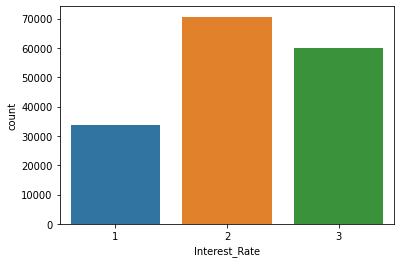

In [4]:
sns.countplot(x="Interest_Rate", data=train_fNxu4vz)

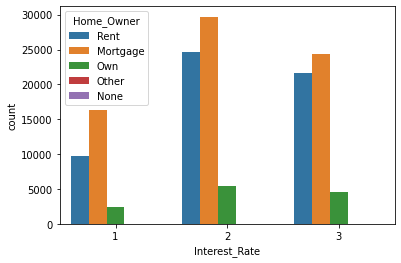

In [5]:
sns.countplot(x="Interest_Rate",hue="Home_Owner", data=train_fNxu4vz)

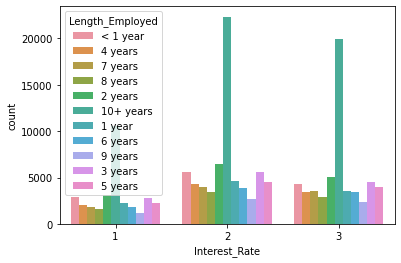

In [6]:
sns.countplot(x="Interest_Rate",hue="Length_Employed", data=train_fNxu4vz)

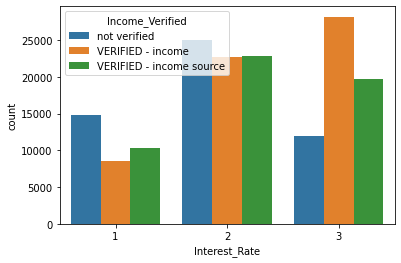

In [7]:
sns.countplot(x="Interest_Rate",hue="Income_Verified", data=train_fNxu4vz)

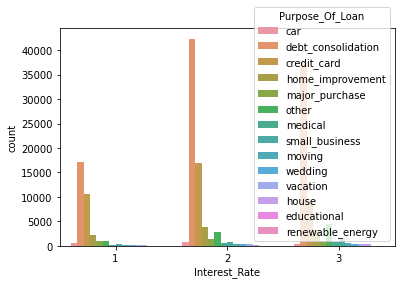

In [8]:
sns.countplot(x="Interest_Rate",hue="Purpose_Of_Loan", data=train_fNxu4vz)

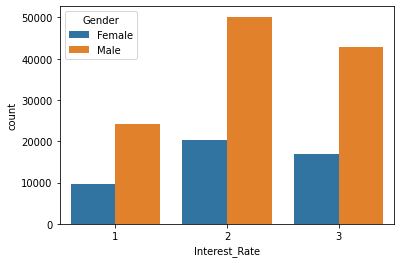

In [9]:
sns.countplot(x="Interest_Rate",hue="Gender", data=train_fNxu4vz)

## Data Wrangling

In [10]:
train_fNxu4vz.isnull().sum()

Loan_ID                        0
Loan_Amount_Requested          0
Length_Employed             7371
Home_Owner                 25349
Annual_Income              25102
Income_Verified                0
Purpose_Of_Loan                0
Debt_To_Income                 0
Inquiries_Last_6Mo             0
Months_Since_Deliquency    88379
Number_Open_Accounts           0
Total_Accounts                 0
Gender                         0
Interest_Rate                  0
dtype: int64

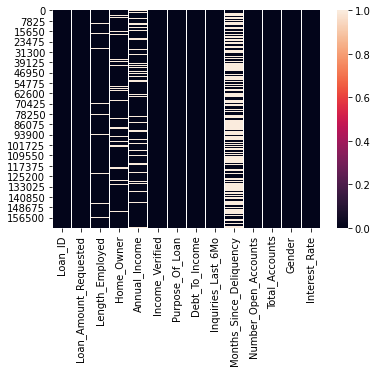

In [11]:
sns.heatmap(train_fNxu4vz.isnull())

In [12]:
train_fNxu4vz['Months_Since_Deliquency'].isnull().sum()
test['Months_Since_Deliquency'].isnull().sum()

58859

In [13]:
train_fNxu4vz['Months_Since_Deliquency']


0          NaN
1         17.0
2          NaN
3          NaN
4          NaN
          ... 
164304     NaN
164305    36.0
164306     NaN
164307    48.0
164308     NaN
Name: Months_Since_Deliquency, Length: 164309, dtype: float64

In [14]:
test.head(5)

,Loan_ID,Loan_Amount_Requested,Length_Employed,Home_Owner,Annual_Income,Income_Verified,Purpose_Of_Loan,Debt_To_Income,Inquiries_Last_6Mo,Months_Since_Deliquency,Number_Open_Accounts,Total_Accounts,Gender
0,10164310,27500.0,10+ years,Mortgage,129000.0,VERIFIED - income,debt_consolidation,12.87,0,68.0,10,37,Male
1,10164311,26000.0,10+ years,NaN,110000.0,not verified,credit_card,11.37,0,NaN,6,23,Male
2,10164312,6075.0,< 1 year,Rent,75000.0,VERIFIED - income,debt_consolidation,6.83,2,NaN,5,20,Male
3,10164313,12000.0,10+ years,Mortgage,73000.0,VERIFIED - income source,debt_consolidation,7.76,0,NaN,6,8,Male
4,10164314,35000.0,< 1 year,Mortgage,156000.0,not verified,debt_consolidation,9.62,0,26.0,9,21,Male


In [15]:
for column in ['Months_Since_Deliquency']:
    train_fNxu4vz[column].fillna(0, inplace=True)
    test[column].fillna(0, inplace=True)


In [16]:
test.isnull().sum()

Loan_ID                        0
Loan_Amount_Requested          0
Length_Employed             4936
Home_Owner                 16711
Annual_Income              16898
Income_Verified                0
Purpose_Of_Loan                0
Debt_To_Income                 0
Inquiries_Last_6Mo             0
Months_Since_Deliquency        0
Number_Open_Accounts           0
Total_Accounts                 0
Gender                         0
dtype: int64

In [17]:
for column in ['Length_Employed', 'Home_Owner']:
    train_fNxu4vz[column].fillna(train_fNxu4vz[column].mode()[0], inplace=True)
    test[column].fillna(test[column].mode()[0], inplace=True)

In [18]:
for column in ['Annual_Income']:
    train_fNxu4vz[column].fillna(train_fNxu4vz[column].mean(), inplace=True)
    test[column].fillna(test[column].mean(), inplace=True)

In [19]:
gender =pd.get_dummies(train_fNxu4vz['Gender'])
gendert = pd.get_dummies(test['Gender'])
gender.head(5)

,Female,Male
0,1,0
1,1,0
2,0,1
3,0,1
4,1,0


In [20]:
income =pd.get_dummies(train_fNxu4vz['Income_Verified'])
income1 =pd.get_dummies(test['Income_Verified'])
income.head(5)

,VERIFIED - income,VERIFIED - income source,not verified
0,0,0,1
1,1,0,0
2,0,1,0
3,0,1,0
4,0,1,0


In [21]:
House_Owned =pd.get_dummies(train_fNxu4vz['Home_Owner'])
House_Owned1 =pd.get_dummies(test['Home_Owner'])
House_Owned.head(5)

,Mortgage,None,Other,Own,Rent
0,0,0,0,0,1
1,1,0,0,0,0
2,1,0,0,0,0
3,1,0,0,0,0
4,0,0,0,1,0


In [22]:
Loan_Purpose =pd.get_dummies(train_fNxu4vz['Purpose_Of_Loan'])
Loan_Purpose1 =pd.get_dummies(test['Purpose_Of_Loan'])
Loan_Purpose.head(5)

,car,credit_card,debt_consolidation,educational,home_improvement,house,major_purchase,medical,moving,other,renewable_energy,small_business,vacation,wedding
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [23]:
Employed_Duration =pd.get_dummies(train_fNxu4vz['Length_Employed'])
Employed_Duration1 =pd.get_dummies(test['Length_Employed'])
Employed_Duration.head(5)

,1 year,10+ years,2 years,3 years,4 years,5 years,6 years,7 years,8 years,9 years,< 1 year
0,0,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,1,0,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,1,0,0


In [24]:
train_fNxu4vz=pd.concat([train_fNxu4vz,Loan_Purpose,House_Owned,income,gender,Employed_Duration],axis=1)
test=pd.concat([test,Loan_Purpose1,House_Owned1,income1,gendert,Employed_Duration1],axis=1)

In [25]:
train_fNxu4vz.drop(['Purpose_Of_Loan','Gender','Home_Owner','Income_Verified','Length_Employed'],axis=1,inplace=True)
test.drop(['Purpose_Of_Loan','Gender','Home_Owner','Income_Verified','Length_Employed'],axis=1,inplace=True)
train_fNxu4vz.head(5)

,Loan_ID,Loan_Amount_Requested,Annual_Income,Debt_To_Income,Inquiries_Last_6Mo,Months_Since_Deliquency,Number_Open_Accounts,Total_Accounts,Interest_Rate,car,...,10+ years,2 years,3 years,4 years,5 years,6 years,7 years,8 years,9 years,< 1 year
0,10000001,7000.0,68000.000000,18.37,0,0.0,9,14,1,1,...,0,0,0,0,0,0,0,0,0,1
1,10000002,30000.0,73331.159434,14.93,0,17.0,12,24,3,0,...,0,0,0,1,0,0,0,0,0,0
2,10000003,24725.0,75566.400000,15.88,0,0.0,12,16,3,0,...,0,0,0,0,0,0,1,0,0,0
3,10000004,16000.0,56160.000000,14.34,3,0.0,16,22,3,0,...,0,0,0,0,0,0,0,0,0,1
4,10000005,17000.0,96000.000000,22.17,1,0.0,19,30,1,0,...,0,0,0,0,0,0,0,1,0,0


In [26]:
test

,Loan_ID,Loan_Amount_Requested,Annual_Income,Debt_To_Income,Inquiries_Last_6Mo,Months_Since_Deliquency,Number_Open_Accounts,Total_Accounts,car,credit_card,...,10+ years,2 years,3 years,4 years,5 years,6 years,7 years,8 years,9 years,< 1 year
0,10164310,27500.0,129000.0,12.87,0,68.0,10,37,0,0,...,1,0,0,0,0,0,0,0,0,0
1,10164311,26000.0,110000.0,11.37,0,0.0,6,23,0,1,...,1,0,0,0,0,0,0,0,0,0
2,10164312,6075.0,75000.0,6.83,2,0.0,5,20,0,0,...,0,0,0,0,0,0,0,0,0,1
3,10164313,12000.0,73000.0,7.76,0,0.0,6,8,0,0,...,1,0,0,0,0,0,0,0,0,0
4,10164314,35000.0,156000.0,9.62,0,26.0,9,21,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109536,10273846,15000.0,120000.0,8.15,2,32.0,13,57,0,0,...,0,0,0,0,0,0,0,0,1,0
109537,10273847,9600.0,125000.0,9.08,1,17.0,9,34,0,1,...,1,0,0,0,0,0,0,0,0,0
109538,10273848,2000.0,37850.0,11.60,0,0.0,10,11,0,1,...,0,0,0,0,1,0,0,0,0,0
109539,10273849,2125.0,30000.0,24.88,0,0.0,5,6,0,0,...,0,0,0,0,0,1,0,0,0,0


## Data Training

In [27]:
X=train_fNxu4vz.drop(['Interest_Rate','Loan_ID'],axis=1)
Y=train_fNxu4vz["Interest_Rate"]

In [28]:
test.drop('Loan_ID',axis=1,inplace=True)


In [29]:
pd.set_option('display.max_columns', None)

In [30]:
# Scaling the Train and Test feature set 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X)
X_test_scaled = scaler.transform(test)

In [36]:
param = {
    'bagging_freq': 5,
    'bagging_fraction': 0.5,
    'boost': 'gbdt',
    'feature_fraction': 0.7,
     'n_estimators':1000,
    'learning_rate': 0.1,
    'num_class':3,
    'metric':'multi_logloss',
    'max_depth': 8,  
    'num_leaves': 70,
    'min_data_in_leaf':40,
    'objective': 'multiclass',
    'scale_pos_weight':1,
    'device':'gpu',
    'verbosity': 1,
     'min_child_weight':6,
 'gamma':0,
 'subsample':0.8,
 'colsample_bytree':0.8,
 'objective':'binary:logistic',
 'nthread':4,
 'scale_pos_weight':1,
 'seed':27
}

In [37]:
model=XGBClassifier(param)

In [38]:
model.fit(X_train_scaled,Y)

XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method=None, validate_parameters=False, verbosity=None)

In [34]:
predict_test = model.predict(X_test_scaled)
submission.Interest_Rate = predict_test
submission.to_csv('solution.csv',index = False)